## Shortest path planning

example from motion planning course offered by Univ of Toronto

A map of Berkley, California is given
* Implement Dijkstra's search algorithm on a road network graph.
* Implement the A* search algorithm using a Euclidean heuristic on a road network graph. 

[OSMNX library](https://osmnx.readthedocs.io/en/stable/) is used to generate Python graphs from Open Street Map (OSM) data.  

In [2]:
!pip install osmnx

     |████████████████████████████████| 102kB 5.6MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 6.6MB 26.7MB/s 
     |████████████████████████████████| 10.3MB 34.4MB/s 
     |████████████████████████████████| 1.0MB 41.7MB/s 
     |████████████████████████████████| 1.0MB 33.6MB/s 
     |████████████████████████████████| 15.4MB 163kB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
import osmnx as ox
import networkx as nx
import numpy as np
from sklearn.neighbors import KDTree 

In [2]:
#from https://github.com/sidmitra/osmnx_playground

dist = 4*805 # radius in meters(approx 2 miles)
places = [
    ['delhi', (28.632821, 77.219459)], 
    ['mumbai', (18.932018, 72.834971)], 
    ['kolkatta', (22.566929, 88.347260)], 
    ['chennai', (13.080271, 80.284657)], 
    ['bengaluru', (12.977830, 77.593817)], 
    ['hyderabad', (17.366103, 78.469492)], 
    ['ahmedabad', (23.026948, 72.574903)], 
    ['jaipur', (26.907290, 75.805467)], 
    ['chandigarh', (30.732453, 76.772294)],
    ['pune', (18.519708, 73.856646)],
    ['lucknow', (26.845984, 80.946011)],
    ['gandhinagar', (23.224847, 72.646416)],   
]

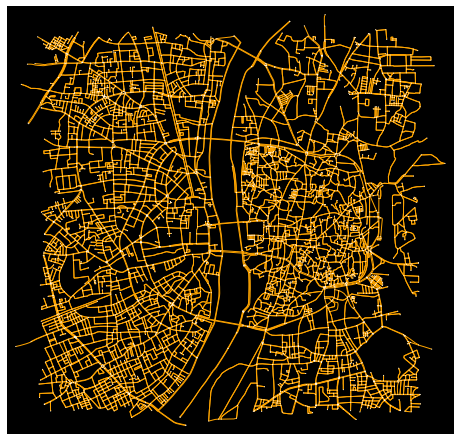

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
name, point = places[6]
nt = 'drive_service'
G = ox.graph_from_point(point, dist=dist,dist_type="bbox", network_type=nt, truncate_by_edge=True)
ox.plot_graph(G, node_size=1, edge_color='orange', bgcolor='#000000', show=True)

Print the edges and nodes of this graph

In [7]:
print(len(G.nodes()), len(G.edges()))

5308 13020


Arbitrarily select the first node and last node in the Graph and find the shortest path

In [108]:
origin = list(G.nodes())[0]
destination = list(G.nodes())[1500]
shortest_path = nx.shortest_path(G, origin, destination)

278589216


Now visualize using plot_graph_route

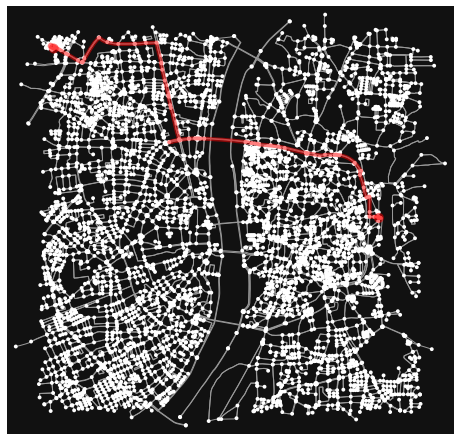

In [9]:
fig, ax = ox.plot_graph_route(G, shortest_path)

In [193]:
# Problem adapted from Introduction to AI, U of Toronto
# https://github.com/booklover98/A-star-Pathfinding

oshawa = (43.945403, -78.892466)
G = ox.graph_from_point(oshawa, dist=2000)
start = ox.geocode('2000 Simcoe St N, Oshawa, Ontario')
end = ox.geocode('18 Niagara Dr, Oshawa, Ontario')

#Convert the graph into geopandas dataframe
# easy to query closest node etc
nodes, _ = ox.graph_to_gdfs(G)
a = nodes.head()
a

,y,x,street_count,highway,geometry
osmid,,,,,
278589216,43.928847,-78.874744,3,NaN,POINT (-78.87474 43.92885)
278589217,43.928758,-78.874863,3,NaN,POINT (-78.87486 43.92876)
278589220,43.928360,-78.877049,3,NaN,POINT (-78.87705 43.92836)
278589616,43.950166,-78.885872,3,NaN,POINT (-78.88587 43.95017)
278589617,43.949039,-78.885790,3,NaN,POINT (-78.88579 43.94904)


In [194]:
tree = KDTree(nodes[['y', 'x']], metric='euclidean')
start_idx = tree.query([start],k=1,return_distance=False)[0]
end_idx = tree.query([end],k=1,return_distance=False)[0]
closest_start_node = nodes.iloc[start_idx]
closest_end_node = nodes.iloc[end_idx]
#retrieve origin and destination node id
origin = closest_start_node.index.values[0]
destination = closest_end_node.index.values[0]

# shortest path between source and destination
shortest_path = nx.shortest_path(G, origin, destination)

Visualize the shortest path and graph

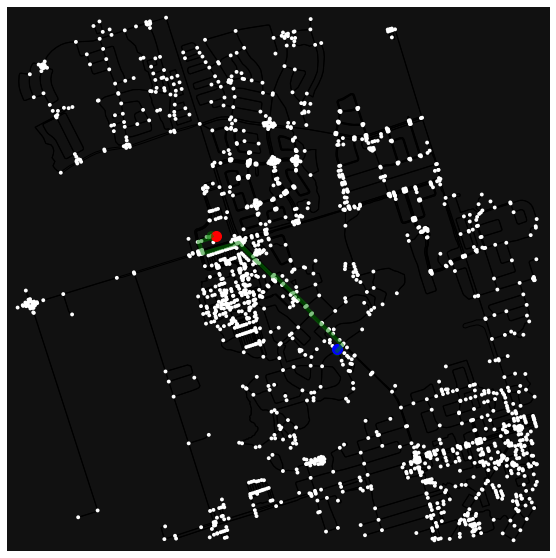

In [195]:
#plot graph with geocodes and nodes
fig, ax = ox.plot_graph_route(G, shortest_path, figsize=(10,10), show=False, close=False, edge_color='black', route_color='green')
ax.scatter(start[1], start[0], c='red', s=100)
ax.scatter(end[1], end[0], c='blue', s=100)
ax.scatter(closest_end_node['y'], closest_end_node['x'], c='green', s=100)
ax.scatter(closest_start_node['y'], closest_start_node['x'], c='green', s=100)

Use these ideas to find shortest path between 2 addresses/ geocodes in an Indian city of your choice 

In [200]:
name, point = places[5]
G1 = ox.graph_from_point(point, dist=2000)
start_add = ox.geocode('Charminar Rd, Char Kaman')
end_add = ox.geocode('Salar Jung Museum')
nodes, _ = ox.graph_to_gdfs(G1)
nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
289927533,17.376580,78.475157,3,NaN,POINT (78.47516 17.37658)
289927859,17.374227,78.479608,3,NaN,POINT (78.47961 17.37423)
289927861,17.375275,78.480368,5,NaN,POINT (78.48037 17.37528)
289928542,17.378432,78.482206,4,NaN,POINT (78.48221 17.37843)
289930133,17.370714,78.462259,3,NaN,POINT (78.46226 17.37071)


In [201]:
tree1 = KDTree(nodes[['y', 'x']], metric='euclidean')
start_idx1 = tree1.query([start_add],k=1,return_distance=False)[0]
end_idx1 = tree1.query([end_add],k=1,return_distance=False)[0]
closest_start_node = nodes.iloc[start_idx1]
closest_end_node = nodes.iloc[end_idx1]
#retrieve origin and destination node id
origin = closest_start_node.index.values[0]

destination = closest_end_node.index.values[0]
print(origin,destination)
# shortest path between source and destination
shortest_path = nx.shortest_path(G1, origin, destination)

2460435023 3612556539


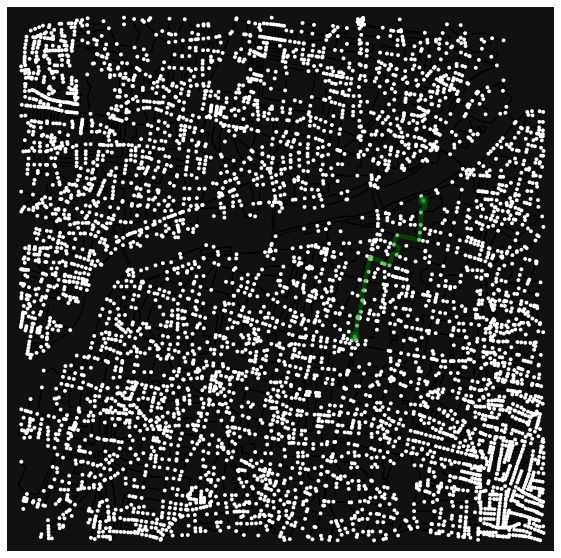

In [202]:
fig, ax = ox.plot_graph_route(G1, shortest_path, figsize=(10,10), show=False, close=False, edge_color='black', route_color='green')
ax.scatter(start[1], start[0], c='red', s=100)
ax.scatter(end[1], end[0], c='blue', s=100)
ax.scatter(closest_end_node['y'], closest_end_node['x'], c='green', s=100)
ax.scatter(closest_start_node['y'], closest_start_node['x'], c='green', s=100)